In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


In [43]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
# exp_dir = 'DQN_single_t4t/'

exp_dir = 'DQN_single_t4td/'

# exp_dir = 'PPO_single_t4t/'

# exp_dir = 'PPO_single_t4td/'

In [44]:
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')

In [45]:
data1

,ID,gamma,lr,n_step,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
0,"DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0....",0.990,0.00010,1.0,"[210.0, 210.0, 220.0, 258.0, 258.0, 258.0, 264...","[69.0, 60.0, 60.0, 60.0, 34.0, 34.0, 34.0, 34....","[128.3, 127.7, 131.53333333333333, 137.525, 14...",0.32,261.0,187.97,103.0,"(0.69,)"
1,"DQN_MG_t4td_env_f7859_00013_13_gamma=0.9,lr=5e...",0.900,0.00005,1.0,"[227.0, 227.0, 227.0, 227.0, 251.0, 251.0, 270...","[105.0, 58.0, 58.0, 58.0, 48.0, 48.0, 48.0, 48...","[158.0, 145.85, 131.6, 129.45, 136.84, 138.983...",0.56,276.0,192.04,101.0,"(0.75,)"
2,"DQN_MG_t4td_env_f7859_00009_9_gamma=0.8,lr=0.0...",0.800,0.00010,1.0,"[228.0, 230.0, 230.0, 246.0, 246.0, 246.0, 275...","[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45....","[149.0, 146.15, 142.03333333333333, 141.675, 1...",0.52,292.0,205.26,100.0,"(0.71,)"
3,"DQN_MG_t4td_env_f7859_00017_17_gamma=0.95,lr=1...",0.950,0.00001,1.0,"[236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236...","[56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56....","[143.2, 159.4, 143.5, 137.85, 141.0, 138.91666...",0.60,268.0,162.80,68.0,"(0.65,)"
4,"DQN_MG_t4td_env_f7859_00036_36_gamma=0.99,lr=1...",0.990,0.00001,5.0,"[221.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235...","[64.0, 64.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56....","[132.4, 136.85, 132.73333333333332, 136.1, 134...",0.67,286.0,170.49,66.0,"(0.56,)"
5,"DQN_MG_t4td_env_f7859_00020_20_gamma=0.999,lr=...",0.999,0.00100,5.0,"[230.0, 237.0, 237.0, 237.0, 240.0, 240.0, 240...","[47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47....","[117.4, 139.45, 150.8, 146.95, 147.86, 147.65,...",0.53,284.0,181.51,38.0,"(0.62,)"
6,"DQN_MG_t4td_env_f7859_00001_1_gamma=0.99,lr=0....",0.990,0.00100,1.0,"[238.0, 238.0, 238.0, 238.0, 238.0, 238.0, 238...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....","[170.0, 147.0, 144.53333333333333, 141.25, 141...",0.42,258.0,187.30,87.0,"(0.58,)"
7,"DQN_MG_t4td_env_f7859_00011_11_gamma=0.99,lr=5...",0.990,0.00005,1.0,"[217.0, 217.0, 217.0, 249.0, 249.0, 249.0, 252...","[83.0, 63.0, 45.0, 37.0, 30.0, 30.0, 30.0, 30....","[143.8, 140.7, 140.3, 143.875, 141.7, 141.9833...",0.32,253.0,194.95,98.0,"(0.62,)"
8,"DQN_MG_t4td_env_f7859_00021_21_gamma=0.99,lr=0...",0.990,0.00100,5.0,"[220.0, 227.0, 227.0, 227.0, 227.0, 253.0, 253...","[57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57....","[146.9, 148.5, 140.4, 138.65, 135.78, 141.1833...",0.62,288.0,194.29,81.0,"(0.76,)"
9,"DQN_MG_t4td_env_f7859_00008_8_gamma=0.9,lr=0.0...",0.900,0.00010,1.0,"[238.0, 238.0, 238.0, 255.0, 255.0, 255.0, 255...","[62.0, 62.0, 62.0, 44.0, 41.0, 41.0, 38.0, 38....","[133.3, 139.25, 146.73333333333332, 147.125, 1...",0.55,293.0,199.58,102.0,"(0.79,)"


In [46]:
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())
n_step_options = sorted(data1['n_step'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    n_step_i = n_step_options.index(data1.loc[ii].n_step)
    
    ep_mean_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].coop_frac


In [47]:
n_step_options

[1.0, 5.0]

In [48]:
lr_options, gamma_options

([1e-05, 5e-05, 0.0001, 0.001], [0.8, 0.9, 0.95, 0.99, 0.999])

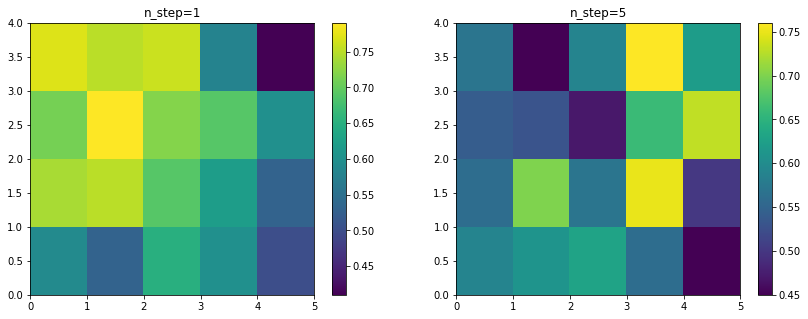

In [49]:
fig = plt.figure(figsize=(14,5))
fig.add_subplot(1,2,1)
plt.pcolor(t4t_frac_arr[:,:,0])
plt.title('n_step=1')
plt.colorbar()

fig.add_subplot(1,2,2)
plt.pcolor(t4t_frac_arr[:,:,1])
plt.title('n_step=5')

plt.colorbar()



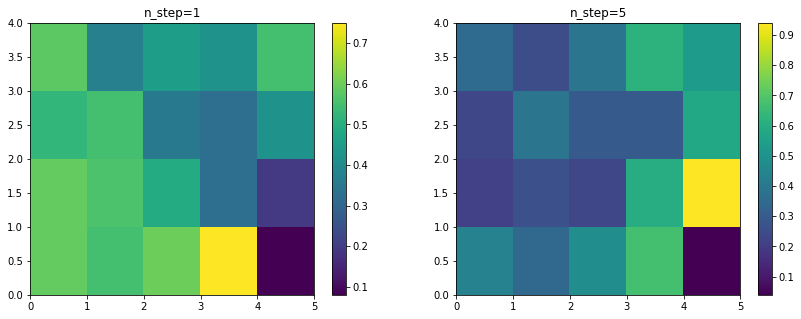

In [50]:
fig = plt.figure(figsize=(14,5))
fig.add_subplot(1,2,1)
plt.pcolor(coop_frac_arr[:,:,0])
plt.title('n_step=1')
plt.colorbar()

fig.add_subplot(1,2,2)
plt.pcolor(coop_frac_arr[:,:,1])
plt.title('n_step=5')

plt.colorbar()



In [51]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4t/'

# exp_dir = 'DQN_single_t4td/'

# exp_dir = 'PPO_single_t4t/'

# exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')

In [52]:
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())
n_step_options = sorted(data1['n_step'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options), len(n_step_options)))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    n_step_i = n_step_options.index(data1.loc[ii].n_step)
    
    ep_mean_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i, n_step_i] = data1.loc[ii].coop_frac


In [53]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
# exp_dir = 'DQN_single_t4t/'

# exp_dir = 'DQN_single_t4td/'

# exp_dir = 'PPO_single_t4t/'

exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac


lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


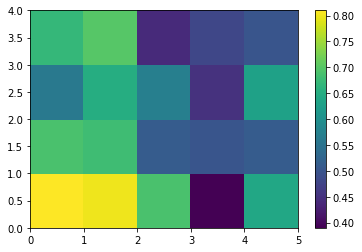

In [54]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(t4t_frac_arr[:,:])
plt.colorbar()

lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


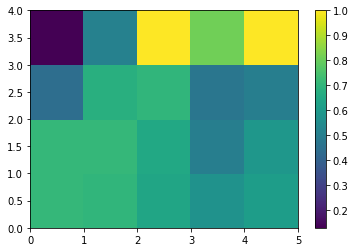

In [55]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(coop_frac_arr[:,:])
plt.colorbar()

In [56]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
# exp_dir = 'DQN_single_t4t/'

# exp_dir = 'DQN_single_t4td/'

exp_dir = 'PPO_single_t4t/'

# exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac


lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


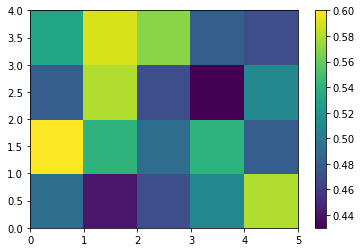

In [57]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(t4t_frac_arr[:,:])
plt.colorbar()

lr: [1e-05, 5e-05, 0.0001, 0.001]
gamma: [0.8, 0.9, 0.95, 0.99, 0.999]


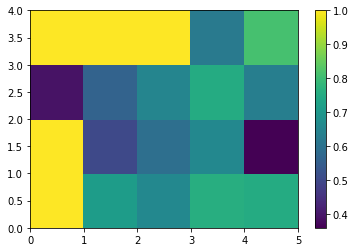

In [58]:
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
plt.pcolor(coop_frac_arr[:,:])
plt.colorbar()

In [100]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['PPO_single_t4td/', 'PPO_single_t4t/', 'PPO_single_t4t_small/', 'PPO_single_t4td_small/']

base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['DQN_single_t4t/', 'DQN_single_t4td/', 'DQN_single_t4t_small/', 'DQN_single_t4td_small/']

exp_dir = exp_dirs[0]

# exp_dir = 'PPO_single_t4td/'
data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
    
    
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
    
    t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
    coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac

In [101]:
print(np.max(np.nan_to_num(t4t_frac_arr)))

0.6


lr: [1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003, 0.001]
gamma: [0.5, 0.7, 0.8, 0.9, 0.95, 0.96, 0.98, 0.99, 0.999, 0.9999, 0.99999]
lr: [1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003, 0.001]
gamma: [0.5, 0.7, 0.8, 0.9, 0.95, 0.96, 0.98, 0.99, 0.999, 0.9999, 0.99999]


Text(0.5, 0.98, 'DQN_single_t4t/')

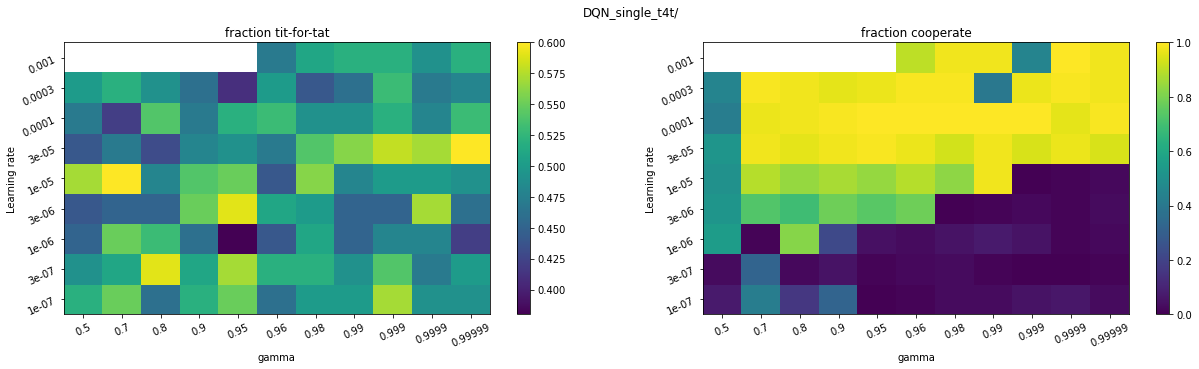

In [104]:
fig = plt.figure(figsize=(21,5))
fig.add_subplot(1,2,1)
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
x1 = np.arange(len(gamma_options)+1)
y1 = np.arange(len(lr_options)+1)
plt.pcolor(x1, y1, t4t_frac_arr);
plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
plt.ylabel('Learning rate')
plt.xlabel('gamma')
plt.title('fraction tit-for-tat')
plt.colorbar()

fig.add_subplot(1,2,2)
print(f'lr: {lr_options}')
print(f'gamma: {gamma_options}')
x1 = np.arange(len(gamma_options)+1)
y1 = np.arange(len(lr_options)+1)
plt.pcolor(x1, y1, coop_frac_arr);
plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
plt.colorbar()
plt.ylabel('Learning rate')
plt.xlabel('gamma')
plt.title('fraction cooperate')
plt.suptitle(exp_dir)

In [93]:
len(lr_options)

6

In [107]:
data1

,ID,gamma,lr,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
0,"DQN_MG_t4t_env_81af5_00093_93_gamma=0.96,lr=0....",0.9600,0.00100,"[249.0, 249.0, 254.0, 258.0, 280.0, 280.0, 287...","[219.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187...","[231.3, 225.05, 227.66666666666663, 231.975, 2...",1.00,301.0,299.04,296.0,"(0.36,)"
1,"DQN_MG_t4t_env_81af5_00047_47_gamma=0.99,lr=1e...",0.9900,0.00001,"[239.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244...","[213.0, 194.0, 194.0, 190.0, 165.0, 163.0, 151...","[225.7, 224.75, 224.2, 221.65, 215.58, 208.933...",0.01,116.0,107.03,103.0,"(0.45,)"
2,"DQN_MG_t4t_env_81af5_00113_113_gamma=0.99,lr=0...",0.9900,0.01000,"[243.0, 251.0, 258.0, 270.0, 270.0, 282.0, 284...","[216.0, 211.0, 211.0, 211.0, 211.0, 211.0, 211...","[229.2, 227.4, 232.5, 237.975, 242.06, 247.0, ...",0.72,268.0,148.84,104.0,"(0.56,)"
3,"DQN_MG_t4t_env_81af5_00070_70_gamma=0.98,lr=0....",0.9800,0.00010,"[240.0, 240.0, 259.0, 264.0, 267.0, 269.0, 277...","[209.0, 203.0, 203.0, 203.0, 203.0, 203.0, 203...","[225.4, 221.15, 227.66666666666663, 233.125, 2...",0.99,302.0,298.77,293.0,"(0.42,)"
4,"DQN_MG_t4t_env_81af5_00068_68_gamma=0.999,lr=0...",0.9990,0.00010,"[237.0, 239.0, 239.0, 275.0, 275.0, 282.0, 282...","[214.0, 198.0, 198.0, 198.0, 198.0, 198.0, 198...","[225.2, 221.9, 222.0, 230.5, 235.66, 241.18333...",0.98,300.0,298.38,291.0,"(0.47,)"
...,...,...,...,...,...,...,...,...,...,...,...
149,"DQN_MG_t4t_env_81af5_00123_123_gamma=0.999,lr=...",0.9990,0.03000,"[234.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235...","[206.0, 199.0, 191.0, 165.0, 154.0, 146.0, 134...","[221.4, 219.25, 214.4, 205.875, 200.74, 195.06...",0.04,210.0,123.09,103.0,"(0.45,)"
150,"DQN_MG_t4t_env_81af5_00139_139_gamma=0.9,lr=0....",0.9000,0.10000,"[235.0, 244.0, 244.0, 244.0, 244.0, 244.0, 244...","[210.0, 204.0, 171.0, 171.0, 162.0, 149.0, 131...","[222.7, 222.55, 216.86666666666667, 211.4, 205...",0.99,301.0,290.53,135.0,"(0.55,)"
151,"DQN_MG_t4t_env_81af5_00150_150_gamma=0.9,lr=0....",0.9000,0.30000,"[245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245...","[213.0, 201.0, 198.0, 189.0, 172.0, 163.0, 150...","[230.1, 224.0, 221.96666666666667, 216.575, 21...",0.60,300.0,262.03,115.0,"(0.44,)"
152,"DQN_MG_t4t_env_81af5_00149_149_gamma=0.95,lr=0...",0.9500,0.30000,"[240.0, 248.0, 248.0, 248.0, 248.0, 248.0, 248...","[203.0, 203.0, 197.0, 176.0, 155.0, 142.0, 142...","[227.7, 228.6, 224.9, 217.25, 210.12, 204.35, ...",0.50,300.0,260.34,148.0,"(0.43,)"


DQN_single_t4td/
max t4t frac:  0.85
mean t4t frac:  0.5611038961038961
std t4t frac:  0.10639037213733991
DQN_single_t4td_small/
max t4t frac:  0.806
mean t4t frac:  0.5641493506493507
std t4t frac:  0.09060122289730661
DQN_single_t4t/
max t4t frac:  0.562
mean t4t frac:  0.49937662337662336
std t4t frac:  0.015483161327788039
DQN_single_t4t_small/
max t4t frac:  0.546
mean t4t frac:  0.49933116883116885
std t4t frac:  0.015688963444361433


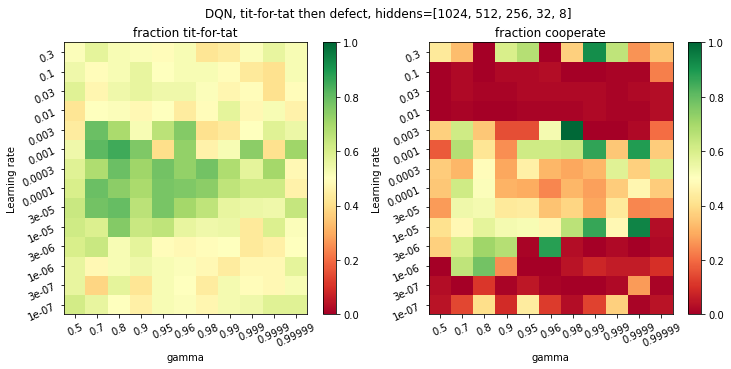

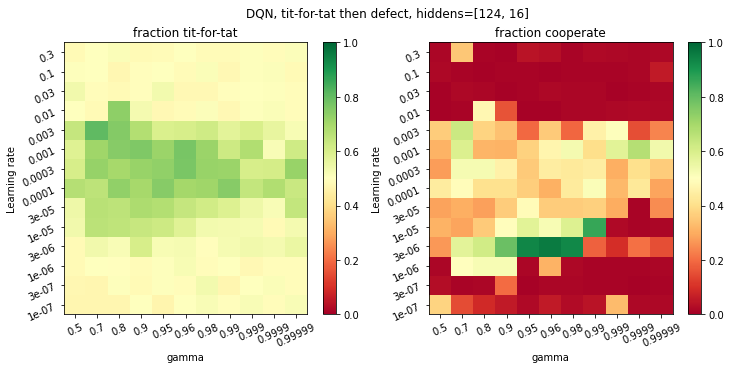

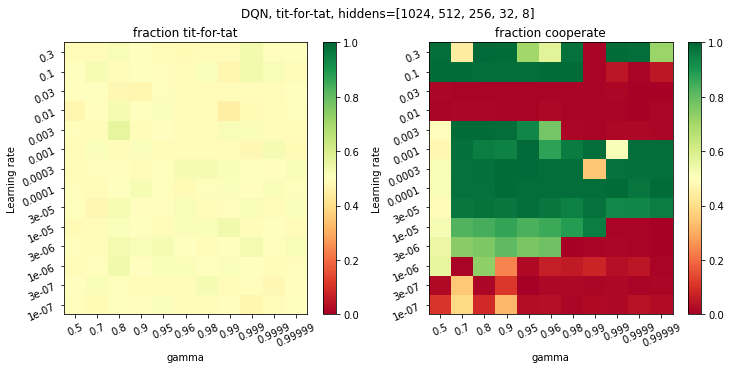

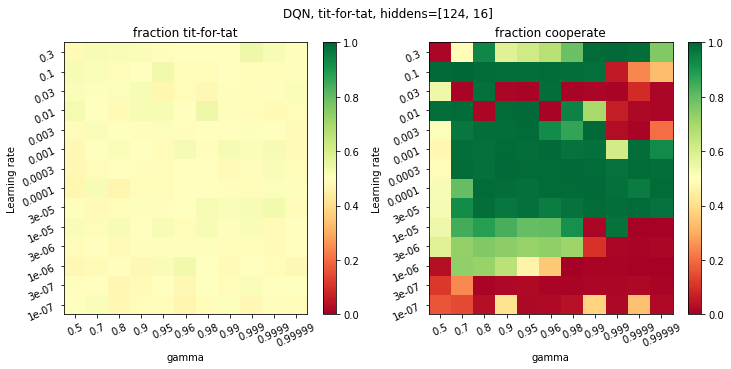

In [15]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['PPO_single_t4td/', 'PPO_single_t4t/', 'PPO_single_t4t_small/', 'PPO_single_t4td_small/']

base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['DQN, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat then defect, hiddens=[124, 16]',
          'DQN, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat, hiddens=[124, 16]',]

exp_dir = exp_dirs[0]

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
        
        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
    fig = plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction tit-for-tat')
    plt.colorbar()
    plt.clim([0,1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.colorbar()
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction cooperate')
    plt.suptitle(titles[pltnum])
    plt.clim([0,1])
    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


PPO_single_t4td/
max t4t frac:  0.67
mean t4t frac:  0.47022727272727266
std t4t frac:  0.19485995712963192
PPO_single_t4td_small/
max t4t frac:  0.82
mean t4t frac:  0.56487012987013
std t4t frac:  0.08842956704945786
PPO_single_t4t/
max t4t frac:  0.61
mean t4t frac:  0.37939393939393945
std t4t frac:  0.20413809042721315
PPO_single_t4t_small/
max t4t frac:  0.62
mean t4t frac:  0.4957142857142857
std t4t frac:  0.050101936905000526


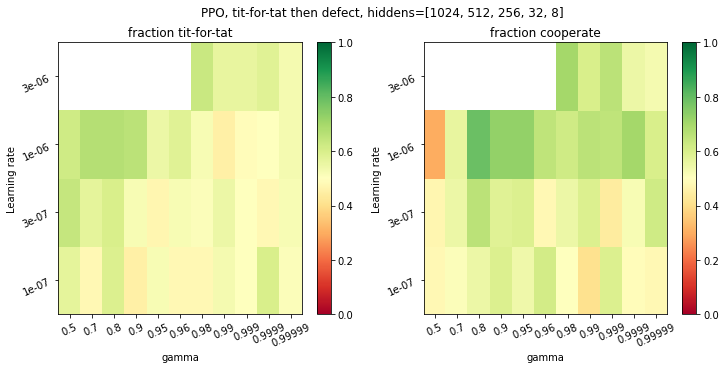

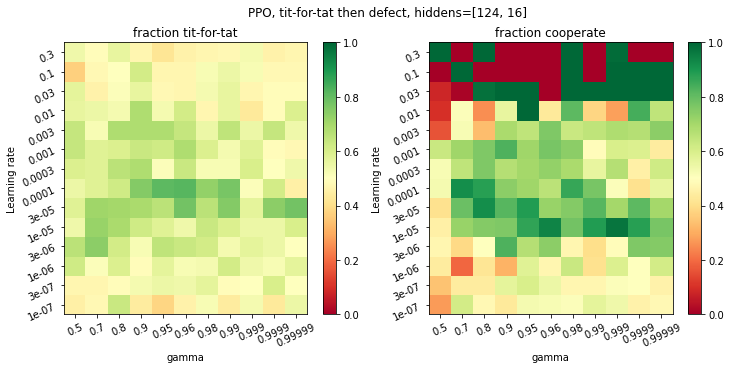

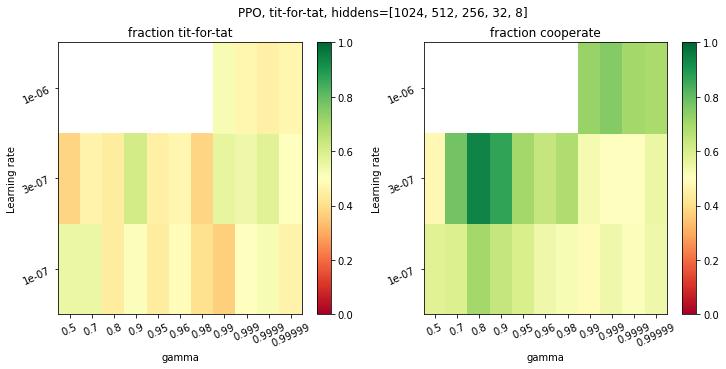

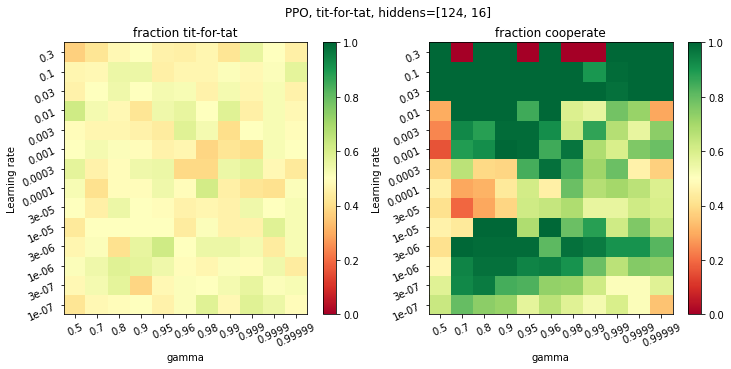

In [20]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['PPO_single_t4td/', 'PPO_single_t4td_small/' , 'PPO_single_t4t/', 'PPO_single_t4t_small/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
# exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['PPO, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat then defect, hiddens=[124, 16]',
          'PPO, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat, hiddens=[124, 16]',]

exp_dir = exp_dirs[0]

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
        
        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]

        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
    fig = plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction tit-for-tat')
    plt.colorbar()
    plt.clim([0, 1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlGn');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.colorbar()
    plt.clim([0, 1])
    plt.ylabel('Learning rate')
    plt.xlabel('gamma')
    plt.title('fraction cooperate')
    plt.suptitle(titles[pltnum])
    
    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))